# CEE 498: Transportation Economics

## Assignment Three: Operator Objectives

Noah Garfinkle (garfink2@illinois.edu)

13 February 2020

# Imports and Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import root_scalar #this works only for scalar functions
from scipy.optimize import minimize
import sympy as sy
%matplotlib inline

# Problem 1

Ridership, $Q$, on a bus line is given by

$$
Q=e^{\alpha-\beta P-\frac{\gamma}{f}}
$$

Where $\alpha=4$, $\beta=0.25$, and $\gamma=4$.
You have to cover fixed costs $F=5$.  The cost of frequency is $c_f=3$.

In [2]:
def Q(P,f,α=4.0,β=0.25,γ=4.0):
    q = np.exp(α-β*P-γ/f)
    return q

In [3]:
def BC(P,f,cf=3.0,F=5.0):
    bc = Q(P,f)*P-cf*f-F
    return bc

## Part a

Derive and calculate values for $P$, $Q$, and $f$ which maximize ridership.

In [33]:
def BC(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    bc = -F
    bc -= np.power(Q*γ/(β*cf),0.5)*cf
    bc += 1/β*(α-(np.power(γ,0.5)*np.power(cf,0.5)*np.power(β,0.5)*np.power(Q,-0.5))-np.log(Q))
    return bc

In [37]:
def BC(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    bc = Q/β*(α-(np.power(γ,0.5)*np.power(cf,0.5)*np.power(β,0.5))/(np.power(Q,0.5))-np.log(Q)) - cf * np.power(Q*γ/(β*cf),0.5) - F
    return bc

In [42]:
def fstar(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    f = np.power(Q*γ/(β*cf),0.5)
    return f

In [43]:
def pstar(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    p = 1/β * (α - (np.power(γ,0.5)*np.power(cf,0.5)*np.power(β,0.5))/np.power(Q,0.5) - np.log(Q))
    return p

In [44]:
def BC(Q,α=4.0,β=0.25,γ=4.0,cf=3.0,F=5.0):
    bc = pstar(Q)*Q - cf * fstar(Q) - F
    return bc

In [45]:
Qs = np.linspace(0.1,10,100)
BCs = [BC(Q) for Q in Qs]

In [46]:
res = root_scalar(BC,x0=1.5,bracket=(1,2))
Qstar = res.root
print(res)
print(res.root)
print(BC(res.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 1.5860474767024555
1.5860474767024555
-1.936228954946273e-13


Text(0, 0.5, 'Budget Constraint')

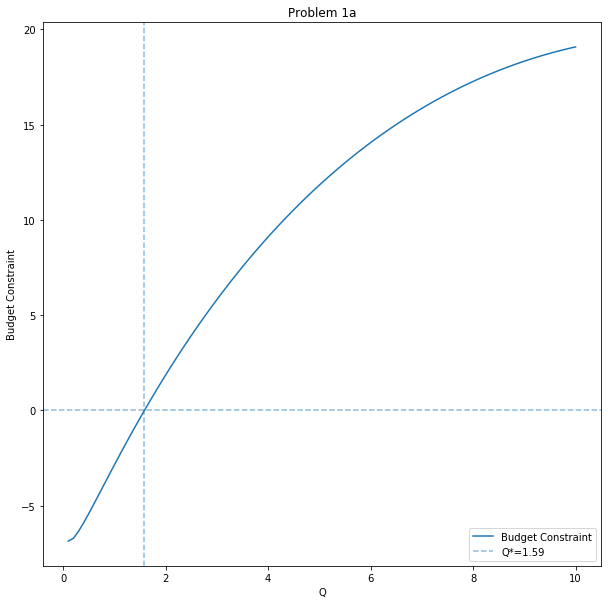

In [47]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Qs,BCs,label="Budget Constraint")
ax.axhline(0,ls="--",alpha=0.5)
ax.axvline(res.root,ls="--",alpha=0.5,label=f"Q*={res.root:,.2f}")
ax.legend()
ax.set_title("Problem 1a")
ax.set_xlabel("Q")
ax.set_ylabel("Budget Constraint")

In [48]:
fstar(Qstar)

2.9084222313389145

In [49]:
pstar(Qstar)

8.653755259932504

## Part b

Derive and calculate values for $P$, $Q$, and $f$ which maximize frequency.

In [8]:
f = 2.02
Ps = np.linspace(0,10,100)
Qs = [Q(P,f) for P in Ps]
BCs = [BC(P,f) for P in Ps]

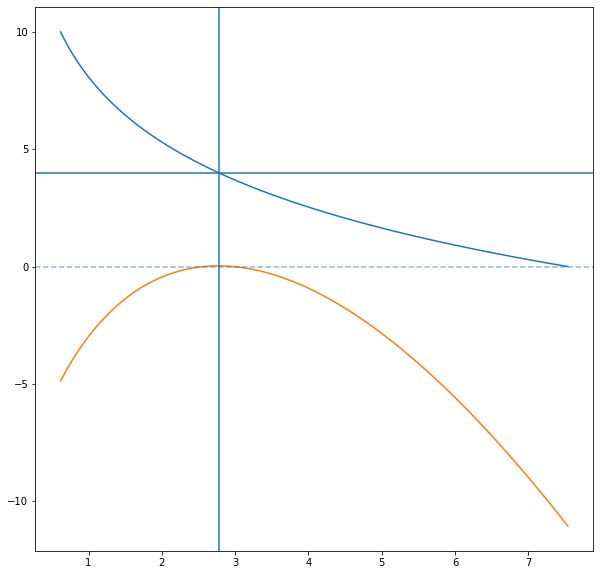

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Qs,Ps,label="Demand Curve")
ax.plot(Qs,BCs,label="Budget Constraint")
ax.axvline(2.78,label="Q*")
ax.axhline(4.0,label="P*")
ax.axhline(0.0,label="y-intercept",ls="--",alpha=0.5)

# Problem 2

Suppose that the federal government agrees to cover the fixed costs, so $F=0$.  Derive, in terms of $\alpha$, $\beta$, $\gamma$ , and $c$ the value of $f$ at which price is minimized, and the minimum price.
